In [127]:
%pip install pandas
%pip install 'SQLAlchemy==1.4.46'
%pip install matplotlib



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [135]:
import pandas as pd

df_air = pd.read_sql_table('air', 'sqlite:///data.sqlite')

df_bikes = pd.read_sql_table('bikes', 'sqlite:///data.sqlite')

print(df_air.columns)
print(df_bikes.columns)

Index(['State / Measuring network', 'Station code', 'Station name',
       'Station setting', 'Station type', 'Annual mean value in µg/m³',
       'Number of hourly mean values above 200 µg/m³*', 'year',
       'Zahl der Stundenmittelwerte über 200 µg/m³'],
      dtype='object')
Index(['month', 'Bonner Straße', 'Deutzer Brücke', 'Hohenzollernbrücke',
       'Neumarkt', 'Zülpicher Straße', 'year', 'Venloer Straße',
       'A.-Schütte-Allee', 'Vorgebirgspark', 'A.-Silbermann-Weg', 'Stadtwald',
       'Niederländer Ufer', 'Vorgebirgswall', 'Universitäts-straße',
       'Rodenkirchener Brücke', 'Severinsbrücke', 'Neusser Straße',
       'Hohe Pforte'],
      dtype='object')


## Bike analysis

### Data after 2015
The data before 2016 seems to be different. The numbers of bikes are in the early records from 2013-2015 higher than 2016 and later.

In [129]:
# Calculate the sum of columns for each year
df_sum_by_year = df_bikes.groupby('year')[df_bikes.columns.difference(['sum', 'month', 'year'])].sum()



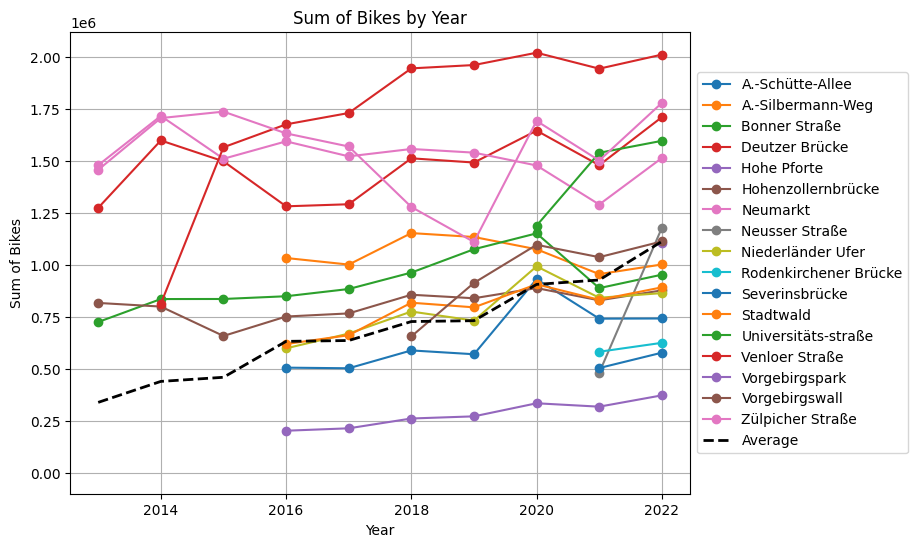

In [130]:
import matplotlib.pyplot as plt

# Calculate the average across the curves for each year
average_line = df_sum_by_year.mean(axis=1)

# Plot the sum for each year as line graphs
plt.figure(figsize=(8, 6))

# Plot the individual curves
for column in df_sum_by_year.columns:
    y_values = df_sum_by_year[column]
    x_values = df_sum_by_year.index
    non_zero_mask = y_values != 0
    zero_mask = ~non_zero_mask
    plt.plot(x_values[non_zero_mask], y_values[non_zero_mask], marker='o', label=column)
    plt.plot(x_values[zero_mask], y_values[zero_mask], marker='o', color='none')


# Plot the average line
plt.plot(df_sum_by_year.index, average_line, color='black', linestyle='--', linewidth=2, label='Average')

plt.xlabel('Year')
plt.ylabel('Sum of Bikes')
plt.title('Sum of Bikes by Year')
plt.grid(True)
plt.legend()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

We see a trend overall that the numbers of bikers increases over time. The black dotted line is the overall average of all streets.

Now we want to find out which streets have records since the beginning and plot them.

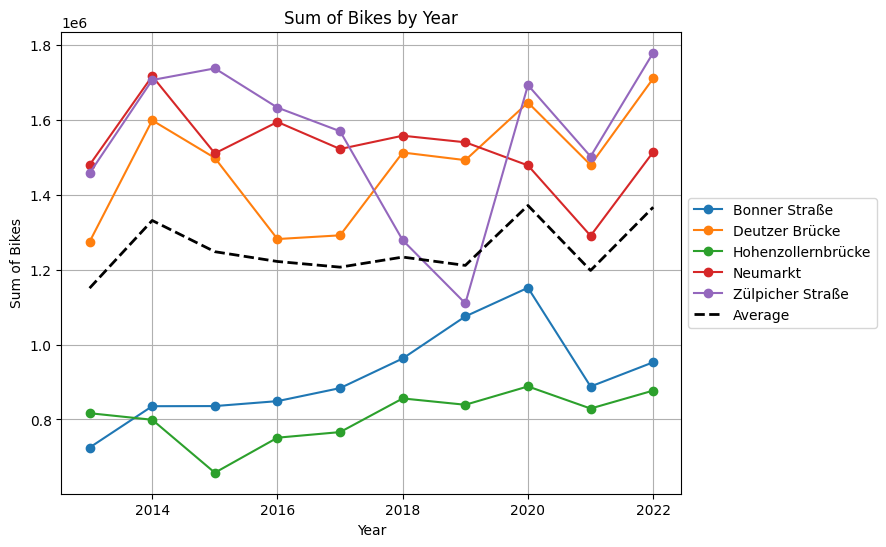

In [131]:
new_df = df_sum_by_year.loc[:, (df_sum_by_year != 0).all()]



# Calculate the average across the curves for each year
average_line = new_df.mean(axis=1)

# Plot the sum for each year as line graphs
plt.figure(figsize=(8, 6))

# Plot the individual curves
for column in new_df.columns:
    y_values = new_df[column]
    x_values = new_df.index
    non_zero_mask = y_values != 0
    zero_mask = ~non_zero_mask
    plt.plot(x_values[non_zero_mask], y_values[non_zero_mask], marker='o', label=column)
    plt.plot(x_values[zero_mask], y_values[zero_mask], marker='o', color='none')


# Plot the average line
plt.plot(new_df.index, average_line, color='black', linestyle='--', linewidth=2, label='Average')

plt.xlabel('Year')
plt.ylabel('Sum of Bikes')
plt.title('Sum of Bikes by Year')
plt.grid(True)
plt.legend()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

We see that the distinct increase is due to the fact every other year new streets are included.

Overall there is a slight increase.

## Air data analysis

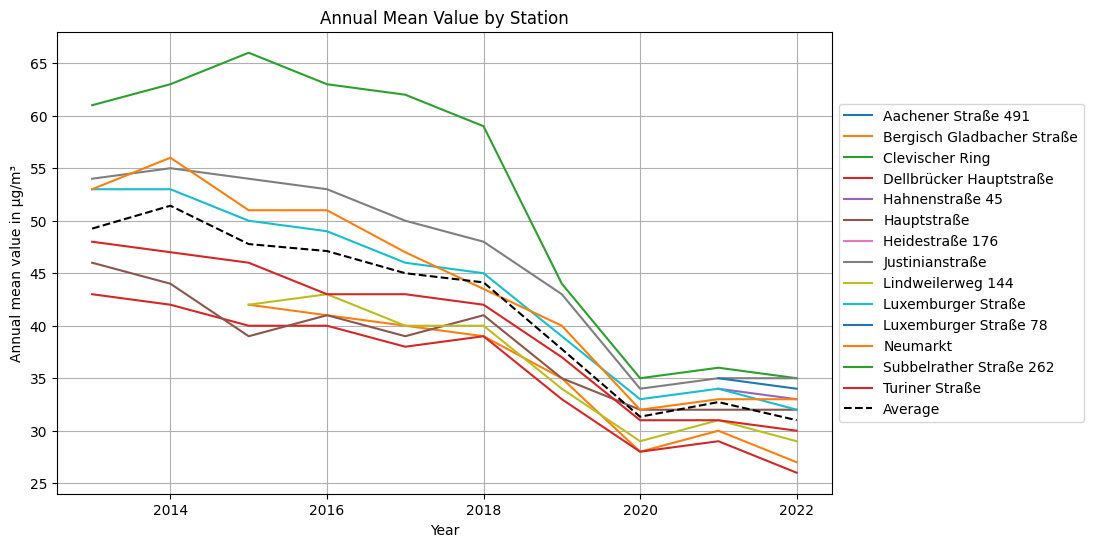

In [132]:
grouped_df = df_air.groupby('Station name')

# Convert the column to numeric
df_air['Annual mean value in µg/m³'] = pd.to_numeric(df_air['Annual mean value in µg/m³'])


# Calculate the average of annual mean values across all stations
average_values = df_air.groupby('year')['Annual mean value in µg/m³'].mean()

# Plotting line graphs for each station
plt.figure(figsize=(10, 6))  # Set the figure size

for station, group in grouped_df:
    plt.plot(group['year'], group['Annual mean value in µg/m³'], label=station)

# Plot the average line
plt.plot(average_values.index, average_values, label='Average', linestyle='--', color='black')

plt.xlabel('Year')
plt.ylabel('Annual mean value in µg/m³')
plt.title('Annual Mean Value by Station')
plt.grid(True)
plt.legend()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

The only data wich matches is "Neumarkt". So the plan will be, that the rest will be averaged. 

The only data wich matches is "Neumarkt". So the plan will be, that the rest will be averaged. 

## Combined analysis

### Join streetnames in bikes  and air

In [133]:
column_names = df_bikes.columns

# Create an empty DataFrame to store the matching data
matching_data = pd.DataFrame()

# Check if the column names exist in the rows of table2
for column_name in column_names:
    matching_rows = df_air[df_air.apply(lambda row: column_name in row.values, axis=1)]
    if not matching_rows.empty:
        matching_data = matching_data.append(matching_rows)


matching_data.head(10)

/tmp/ipykernel_3689/64051299.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matching_data = matching_data.append(matching_rows)


,State / Measuring network,Station code,Station name,Station setting,Station type,Annual mean value in µg/m³,Number of hourly mean values above 200 µg/m³*,year,Zahl der Stundenmittelwerte über 200 µg/m³
1,North Rhine-Westphalia,DENW151,Neumarkt,urban area,traffic,53.0,-,2013,None
9,North Rhine-Westphalia,DENW151,Neumarkt,urban area,traffic,56.0,-,2014,None
16,North Rhine-Westphalia,DENW151,Neumarkt,urban area,traffic,51.0,-,2015,None
25,North Rhine-Westphalia,DENW151,Neumarkt,urban area,traffic,51.0,-,2016,None
34,North Rhine-Westphalia,DENW151,Neumarkt,urban area,traffic,47.0,-,2017,None
51,North Rhine-Westphalia,DENW151,Neumarkt,urban area,traffic,40.0,-,2019,None
60,North Rhine-Westphalia,DENW151,Neumarkt,urban area,traffic,32.0,-,2020,None
69,North Rhine-Westphalia,DENW151,Neumarkt,urban area,traffic,33.0,-,2021,-
80,North Rhine-Westphalia,DENW151,Neumarkt,urban area,traffic,33.0,None,2022,-


The only data wich matches is "Neumarkt". So the plan will be, that the rest will be averaged. 

For Neumarkt, next we want to find out, what kind of correlation is between number of bikes and air quality.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


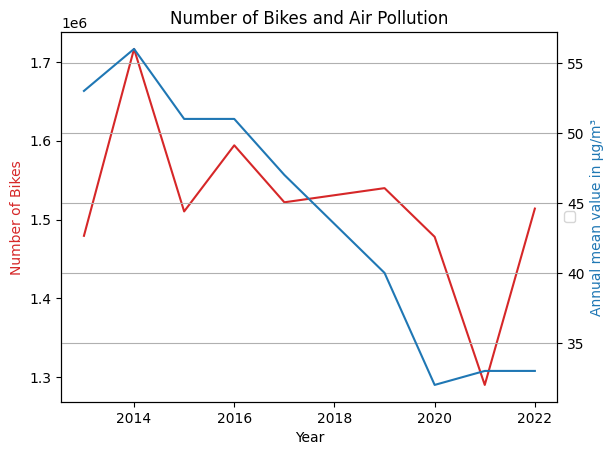

In [151]:
# Merge 'matching_df' with 'df_sum_by_year' on the 'year' column
merged_df = pd.merge(df_sum_by_year, matching_data, on='year')

# Extract the required columns for the line graph
plot_data = merged_df[['year', 'Neumarkt', 'Annual mean value in µg/m³']]

# Calculate the average values for each year
average_values = plot_data.mean(axis=1)

# Create the line graph
fig, ax1 = plt.subplots()

# Plot the Number of bikes on the first y-axis
ax1.plot(plot_data['year'], plot_data['Neumarkt'], color='tab:red')
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Bikes', color='tab:red')

# Create a second y-axis and plot the Annual mean value in µg/m³
ax2 = ax1.twinx()
ax2.plot(plot_data['year'], plot_data['Annual mean value in µg/m³'], color='tab:blue')
ax2.set_ylabel('Annual mean value in µg/m³', color='tab:blue')

# Customize the graph's appearance
plt.title('Number of Bikes and Air Pollution')
plt.grid(True)
plt.legend()

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

It seems, that alone on this street, there is no direct correlation between bikers and air pollution.